# Choosing the best classifier for sign language dataset

In [46]:
import os
import pickle

import mediapipe as mp
import cv2
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

import warnings

warnings.filterwarnings('ignore')

In [10]:
data_dict = pickle.load(open('dataset_dictionary.pickle', 'rb'))

In [11]:
df = pd.DataFrame(data=data_dict['data'])
df['sign_number'] = data_dict['labels']
df.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,sign_number
0,0.176237,0.265538,0.145103,0.164993,0.091986,0.094154,0.037782,0.047897,0.011824,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0.176796,0.266859,0.145541,0.166711,0.092821,0.096287,0.037964,0.049173,0.012594,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0.175248,0.268204,0.146128,0.169321,0.094887,0.097236,0.042042,0.049603,0.016205,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,0.177636,0.270464,0.149813,0.172520,0.096929,0.099372,0.042679,0.051389,0.016549,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0.177636,0.270464,0.149813,0.172520,0.096929,0.099372,0.042679,0.051389,0.016549,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [12]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.118881,0.291285,0.109301,0.261602,0.091505,0.220358,0.078991,0.190795,0.076076,0.171436,...,0.073763,0.003349,0.138352,0.143725,0.137284,0.098483,0.133121,0.066072,0.127598,0.037527
std,0.055715,0.143089,0.059133,0.104055,0.064092,0.078656,0.068267,0.088795,0.081323,0.118383,...,0.003383,0.002636,0.006396,0.006955,0.004479,0.005653,0.003279,0.003634,0.003041,0.002940
min,0.000000,0.000000,0.004997,0.048601,0.000000,0.084305,0.001946,0.043340,0.000000,0.000000,...,0.070708,0.000000,0.129553,0.135715,0.131372,0.093004,0.129378,0.062165,0.124260,0.035212
25%,0.076922,0.240582,0.067369,0.172428,0.052962,0.153182,0.034905,0.107450,0.028457,0.000000,...,0.071011,0.000928,0.131858,0.139686,0.132854,0.094828,0.130024,0.063931,0.124748,0.035362
50%,0.120803,0.300612,0.104801,0.257298,0.080165,0.218181,0.053888,0.207923,0.055334,0.202540,...,0.073044,0.004256,0.140716,0.141783,0.138403,0.096232,0.133181,0.064828,0.127518,0.036103
75%,0.152429,0.392501,0.149883,0.344688,0.124512,0.273149,0.090152,0.255946,0.083242,0.254519,...,0.074168,0.005780,0.142658,0.150720,0.139508,0.104177,0.134402,0.069718,0.128826,0.040404
max,0.291711,0.562328,0.252582,0.486696,0.292311,0.402830,0.335255,0.495788,0.384387,0.585483,...,0.079581,0.006288,0.144671,0.153000,0.142799,0.106357,0.137975,0.071049,0.132149,0.041742


In [13]:
df.isna().sum()

0                0
1                0
2                0
3                0
4                0
              ... 
80             762
81             762
82             762
83             762
sign_number      0
Length: 85, dtype: int64

In [14]:
df = df.drop(df.columns[42:-1], axis='columns')

In [15]:
df.isna().sum()

0              0
1              0
2              0
3              0
4              0
5              0
6              0
7              0
8              0
9              0
10             0
11             0
12             0
13             0
14             0
15             0
16             0
17             0
18             0
19             0
20             0
21             0
22             0
23             0
24             0
25             0
26             0
27             0
28             0
29             0
30             0
31             0
32             0
33             0
34             0
35             0
36             0
37             0
38             0
39             0
40             0
41             0
sign_number    0
dtype: int64

# The data we have

The data we have is coordinates which giving mediapipe based on my own photos of each sign


- **In the dataset there are such signs as:** *(starting from 0)*

    0. **Like**
    1. **Like front**
    2. **Dislike**
    3. **Dislike front**
    4. **Ok**
    5. **Peace**
    6. **Rock**
    7. **YessPeace**
    8. Shaka
    9. Fuck
    10. Spock
    11. [Westcoast](https://i.pinimg.com/1200x/5f/de/2b/5fde2bdfbe7d84925c2f71159c22b982.jpg)
    12. [Eastcoast](https://thesource.com/wp-content/uploads/2017/10/Snoop-Dogg-Hints-New-Album-Make-America-Crip-Again.jpg)
    13. [Crips](https://video-images.vice.com/videos/58dc3000466f70ae1467bb8d/lede/1510849962065-gang_initiation_approved_v2-clean.jpeg)

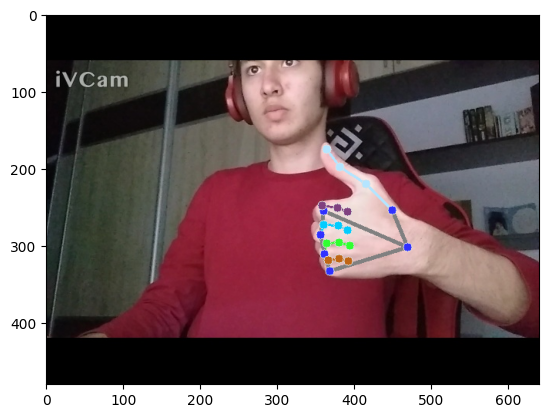

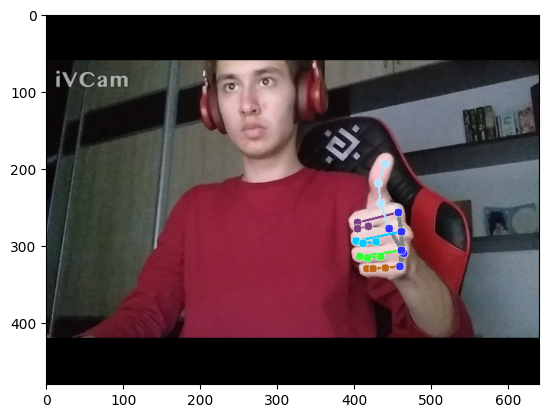

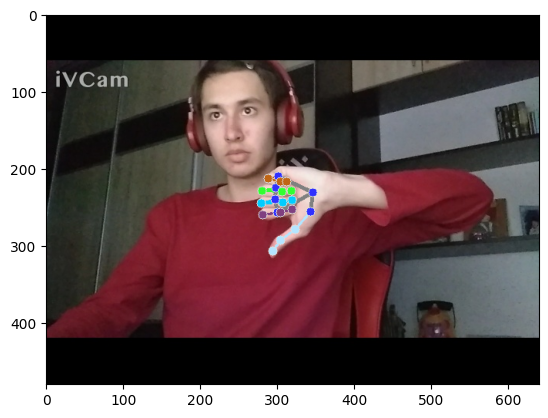

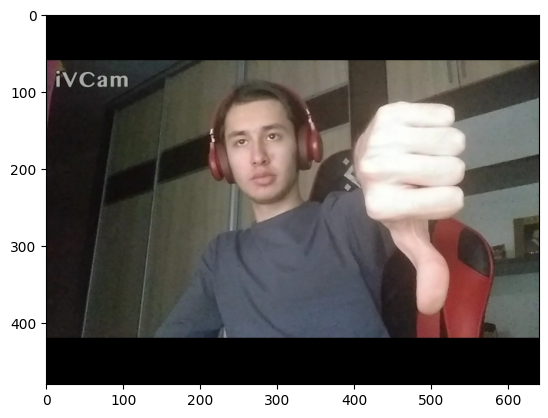

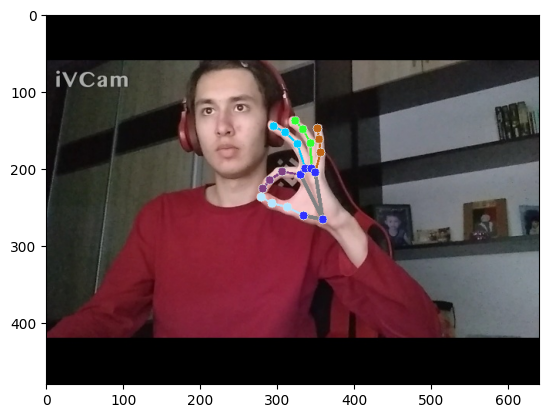

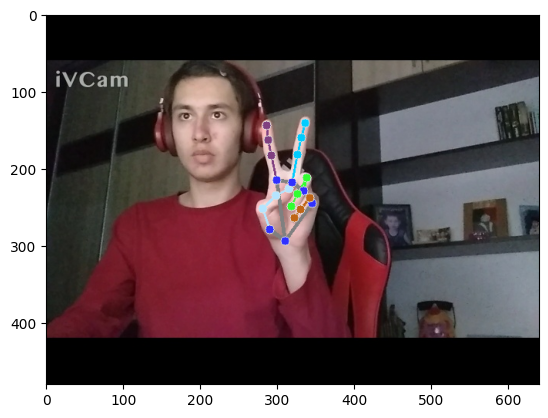

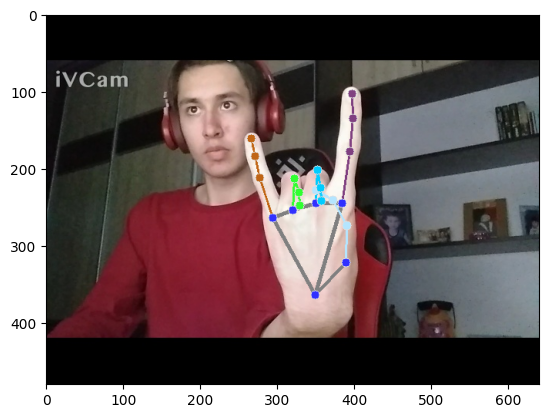

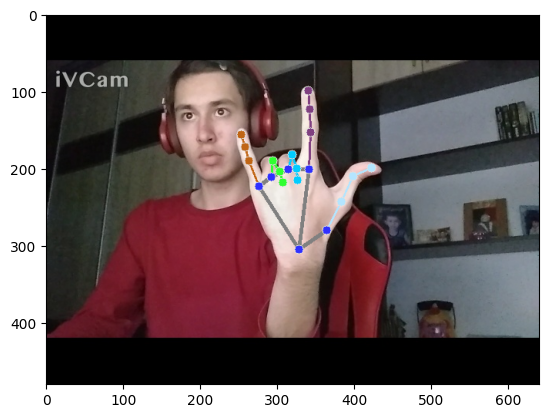

In [4]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = './data'

for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_))[:1]:
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    img_rgb,  # image to draw
                    hand_landmarks,  # model output
                    mp_hands.HAND_CONNECTIONS,  # hand connections
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style(),
                )

        plt.figure()
        plt.imshow(img_rgb)

plt.show()

# Adding variety to the signs

We need to create the following types of signs variations: *inverse, vertically mirrored, horizontal mirrored, vertically&horizontally mirrored*.

But we don't need creating any pictures, we have just use our coordinates.

Let's say our sign is by number 0, then the *vertically mirrored* is by label *0_0*, the *horizontal mirrored* is by label *0_1* and the *vertically&horizontally mirrored* is by label *0_2*

In [82]:
new_df = df

for i, df_line in df.iterrows():
    sign_number = df_line['sign_number']

    df_line_x = df_line[:-1:2]
    df_line_y = df_line[1::2]

    x_min, y_min = df_line_x.min(), df_line_y.min()
    x_max, y_max = df_line_x.max(), df_line_y.max()

    vertically_mirrored = []
    horizontal_mirrored = []
    vertically_horizontally_mirrored = []

    for x, y in zip(df_line_x, df_line_y):
        vertically_mirrored.extend((x, y_max - y))
        horizontal_mirrored.extend((x_max - x, y))
        vertically_horizontally_mirrored.extend((x_max - x, y_max - y))

    vertically_mirrored.append(sign_number + '_0')
    horizontal_mirrored.append(sign_number + '_1')
    vertically_horizontally_mirrored.append(sign_number + '_2')

    for mirror in (vertically_mirrored, horizontal_mirrored, vertically_horizontally_mirrored):
        new_df = pd.concat([new_df, pd.DataFrame([mirror], columns=df.columns)], ignore_index=True)

new_df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,sign_number
0,0.176237,0.265538,0.145103,0.164993,0.091986,0.094154,0.037782,0.047897,0.011824,0.000000,...,0.261856,0.018710,0.329986,0.015047,0.301295,0.037012,0.296828,0.055984,0.301927,0
1,0.176796,0.266859,0.145541,0.166711,0.092821,0.096287,0.037964,0.049173,0.012594,0.000000,...,0.261821,0.019045,0.330431,0.013136,0.301031,0.034377,0.296401,0.053103,0.301806,0
2,0.175248,0.268204,0.146128,0.169321,0.094887,0.097236,0.042042,0.049603,0.016205,0.000000,...,0.267249,0.018418,0.331435,0.017169,0.306901,0.038989,0.302390,0.057394,0.305908,0
3,0.177636,0.270464,0.149813,0.172520,0.096929,0.099372,0.042679,0.051389,0.016549,0.000000,...,0.276531,0.018614,0.337289,0.022632,0.320682,0.045836,0.316598,0.064083,0.317758,0
4,0.177636,0.270464,0.149813,0.172520,0.096929,0.099372,0.042679,0.051389,0.016549,0.000000,...,0.276531,0.018614,0.337289,0.022632,0.320682,0.045836,0.316598,0.064083,0.317758,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,0.105150,0.350714,0.063640,0.303846,0.042873,0.240073,0.027908,0.183711,0.000000,0.162087,...,0.206497,0.181475,0.220314,0.203867,0.168186,0.215266,0.137759,0.224391,0.114882,7_1
3084,0.105150,0.000000,0.063640,0.046868,0.042873,0.110641,0.027908,0.167003,0.000000,0.188627,...,0.144218,0.181475,0.130400,0.203867,0.182528,0.215266,0.212955,0.224391,0.235832,7_2
3085,0.119241,0.000000,0.160750,0.046868,0.181518,0.110641,0.196483,0.167003,0.224391,0.188627,...,0.144218,0.042916,0.130400,0.020524,0.182528,0.009125,0.212955,0.000000,0.235832,7_0
3086,0.105150,0.350714,0.063640,0.303846,0.042873,0.240073,0.027908,0.183711,0.000000,0.162087,...,0.206497,0.181475,0.220314,0.203867,0.168186,0.215266,0.137759,0.224391,0.114882,7_1


# Creating and training the model

In [83]:
inputs = df.drop(['sign_number'], axis=1)
target = df['sign_number']

In [84]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': (100, 150, 200)
        }
    },
    'Bagging': {
        'model': BaggingClassifier(max_samples=0.8, oob_score=True),
        'params': {
            'base_estimator': (DecisionTreeClassifier(), SVC(), LogisticRegression()),
            'n_estimators': (100, 150, 200)
        }
    },
}

In [85]:
scores = []

for model_name, mp in model_params.items():
    clf = RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_iter=20)

    clf.fit(inputs, target)  # training data

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,random_forest,0.992208,{'n_estimators': 100}
1,Bagging,0.992208,"{'n_estimators': 100, 'base_estimator': Decisi..."


# Training and saving the best model

The best model as you can see above is RandomForestClassifier with 150 number of trees or Bagging with DecisionTreeClassifier, which is the same thing

In [86]:
model = BaggingClassifier(max_samples=0.8, oob_score=True, n_estimators=150, base_estimator=DecisionTreeClassifier())
model.fit(inputs, target)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=150, oob_score=True)

In [87]:
with open('model.pickle', 'wb') as file:
    pickle.dump(model, file)